In [1]:
from pydoc import pager
import re
from sre_constants import IN
from wsgiref import headers
import requests
from bs4 import BeautifulSoup
import sqlite3
from selenium import webdriver
import time
import pandas as pd

# sqlite3 연결
conn = sqlite3.connect('poems.db', isolation_level=None)
cur = conn.cursor()

cur.execute("SELECT * FROM Book1_table")
rows = cur.fetchall()
cols = [column[0] for column in cur.description]

data_titles = pd.DataFrame.from_records(data=rows, columns=cols)

cur.execute("SELECT * FROM Book2_table")
rows2 = cur.fetchall()
cols2 = [column[0] for column in cur.description]

data_book_info = pd.DataFrame.from_records(data=rows2, columns=cols2)

cur.execute("SELECT * FROM Dbpia_table")
rows3 = cur.fetchall()
cols3 = [column[0] for column in cur.description]

data_dbpia = pd.DataFrame.from_records(data=rows3, columns=cols3)

conn.close()

In [2]:
data_titles.shape, data_book_info.shape, data_dbpia.shape

((10000, 3), (10000, 12), (10000, 2))

In [3]:
data_titles.head()

id    Book_Title    BOOK_id
0   1      침묵은 하염없이  296431164
1   2         시의 소굴  296588098
2   3     삶의 글 살며 시  296613180
3   4      행복하며 깨치며  296921059
4   5  히키코모리를 위한 변명  296929833

In [4]:
data_titles = data_titles.drop(columns=['id', 'BOOK_id'])
data_titles.head()

Book_Title
0      침묵은 하염없이
1         시의 소굴
2     삶의 글 살며 시
3      행복하며 깨치며
4  히키코모리를 위한 변명

In [5]:
data_book_info.head()

id Author Publisher    Pub_date  Price  Sales_point  Score  Rev_100  \
0   1    안경례    지식과감성#  2022-07-07  19000           10    0.0        0   
1   2    곽진구      시산맥사  2022-07-05  10000           10    0.0        0   
2   3    김영성        산다  2022-07-01  15000           80    0.0        0   
3   4    김용환     현대시학사  2022-06-30  13500           10    0.0        0   
4   5    김은숙      시산맥사  2022-06-29  10000           10    0.0        0   

   Rev_num  Page_num  Weight DBPia_rev  
0        0     208.0   312.0      None  
1        0     160.0   208.0      None  
2        0     288.0   374.0      None  
3        0     190.0   251.0      None  
4        0     150.0   195.0      None

In [6]:
data_book_info = data_book_info.drop(columns=['id', 'DBPia_rev'])
data_book_info.head()

Author Publisher    Pub_date  Price  Sales_point  Score  Rev_100  Rev_num  \
0    안경례    지식과감성#  2022-07-07  19000           10    0.0        0        0   
1    곽진구      시산맥사  2022-07-05  10000           10    0.0        0        0   
2    김영성        산다  2022-07-01  15000           80    0.0        0        0   
3    김용환     현대시학사  2022-06-30  13500           10    0.0        0        0   
4    김은숙      시산맥사  2022-06-29  10000           10    0.0        0        0   

   Page_num  Weight  
0     208.0   312.0  
1     160.0   208.0  
2     288.0   374.0  
3     190.0   251.0  
4     150.0   195.0

In [7]:
data_dbpia.head()

id  DBPia_rev
0   1        NaN
1   2        NaN
2   3        NaN
3   4        NaN
4   5       14.0

In [8]:
data_dbpia = data_dbpia.drop(columns='id')
data_dbpia.head()

DBPia_rev
0        NaN
1        NaN
2        NaN
3        NaN
4       14.0

In [9]:
# no results(None) -> '0'
data_dbpia = data_dbpia.fillna(0)
data_dbpia.head()

DBPia_rev
0        0.0
1        0.0
2        0.0
3        0.0
4       14.0

In [10]:
# merge
df = pd.concat([data_titles, data_book_info, data_dbpia], axis=1)
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev  
0        0        0     208.0   312.0        0.0  
1        0        0     160.0   208.0        0.0  
2        0        0     288.0   374.0        0.0  
3        0        0     190.0   251.0        0.0  
4        0        0     150.0   195.0       14.0

In [11]:
df.shape

(10000, 12)

In [12]:
df['Publisher'].describe()

count           9873
unique          1323
top       부크크(bookk)
freq             724
Name: Publisher, dtype: object

In [13]:
df['Publisher'].value_counts()

부크크(bookk)                 724
좋은땅                        212
천년의시작                      204
청어                         183
시산맥사                       165
                          ... 
,김태봉 (그림)지식과감성#              1
에코미디어                        1
,강채린,강유준 (그림)부크크(bookk)      1
은산문학사                        1
돌베개                          1
Name: Publisher, Length: 1323, dtype: int64

In [14]:
df['Publisher']

0       지식과감성#
1         시산맥사
2           산다
3        현대시학사
4         시산맥사
         ...  
9995      월간문학
9996    오늘의문학사
9997      시문학사
9998      None
9999      월간문학
Name: Publisher, Length: 10000, dtype: object

In [15]:
df = df.dropna(subset=['Publisher'])

In [16]:
df.shape

(9873, 12)

In [17]:
df.head()


Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev  
0        0        0     208.0   312.0        0.0  
1        0        0     160.0   208.0        0.0  
2        0        0     288.0   374.0        0.0  
3        0        0     190.0   251.0        0.0  
4        0        0     150.0   195.0       14.0

In [18]:
df['Publisher'][df['Publisher'].str.contains('(그림)') == True] = df['Publisher'].str.split('(그림)')[1]
df['Publisher'][df['Publisher'].str.contains('(엮은이)') == True] = df['Publisher'].str.split('(엮은이)')[1]
df['Publisher'][df['Publisher'].str.contains('(손글씨)') == True] = df['Publisher'].str.split('(손글씨)')[1]
df['Publisher'][df['Publisher'].str.contains('(사진)') == True] = df['Publisher'].str.split('(사진)')[1]

C:\Users\Namjin Kim\AppData\Local\Temp\ipykernel_1128\2975897999.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Publisher'][df['Publisher'].str.contains('(그림)') == True] = df['Publisher'].str.split('(그림)')[1]
C:\Users\Namjin Kim\AppData\Local\Temp\ipykernel_1128\2975897999.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Publisher'][df['Publisher'].str.contains('(엮은이)') == True] = df['Publisher'].str.split('(엮은이)')[1]
C:\Users\Namjin Kim\AppData\Local\Temp\ipykernel_1128\2975897999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'][df['Publisher'].str.contains('(엮은이)') == True] = df['Publisher']

In [19]:
df.shape

(9873, 12)

In [20]:
df.head(100)

Book_Title Author Publisher    Pub_date  Price  Sales_point  \
0              침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10   
1                 시의 소굴    곽진구      시산맥사  2022-07-05  10000           10   
2             삶의 글 살며 시    김영성        산다  2022-07-01  15000           80   
3              행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10   
4          히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10   
..                  ...    ...       ...         ...    ...          ...   
96              이육사 작품집    이육사      시산맥사  2022-06-10  15000           10   
97              김소월 작품집    김소월      시산맥사  2022-06-10  16000           10   
98   나는 나를 사랑해서 나를 혐오하고    서효인      문학동네  2022-06-10  10000         8590   
99             마음이 다닌 길    김춘자      바른북스  2022-06-10  13000           70   
100              황금빛 위로    최명숙    지식과감성#  2022-06-10  15000          280   

     Score  Rev_100  Rev_num  Page_num  Weight  DBPia_rev  
0      0.0        0        0     208.0   312.0        0.0  
1      0.0        0        0     160.0   208.0        0.0  
2      0.0        0        0     288.0   374.0        0.0  
3      0.0        0        0     190.0   251.0        0.0  
4      0.0        0        0     150.0   195.0       14.0  
..     ...      ...      ...       ...     ...        ...  
96     0.0        0        0     342.0   445.0        0.0  
97     0.0        0        0     470.0   611.0        0.0  
98     0.0        0        0     124.0   159.0        0.0  
99     0.0        0        0     132.0   172.0        0.0  
100   10.0        0        1     164.0     NaN        0.0  

[100 rows x 12 columns]

In [21]:
major_publisher = ['창비', '문학과지성사', '문학동네', '민음사']

In [22]:
df = df.reset_index(drop=True)

In [23]:
df['Publisher_category'] = df['Publisher']

In [24]:
import numpy as np

condition = [
    (df['Publisher'] == '창비') | (df['Publisher'] == '문학과지성사') | (df['Publisher'] == '문학동네') | (df['Publisher'] == '민음사'),
    (df['Publisher'] != '창비') & (df['Publisher'] != '문학과지성사') & (df['Publisher'] != '문학동네') & (df['Publisher'] != '민음사')
]
choice = [1, 0]     # 1: 메이저 출판사, 0 : 기타 출판사
df['Publisher_category'] = np.select(condition, choice, default='Not Specified')


In [25]:
df['Publisher_category'].value_counts()

0    9612
1     261
Name: Publisher_category, dtype: int64

In [26]:
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  
0        0        0     208.0   312.0        0.0                  0  
1        0        0     160.0   208.0        0.0                  0  
2        0        0     288.0   374.0        0.0                  0  
3        0        0     190.0   251.0        0.0                  0  
4        0        0     150.0   195.0       14.0                  0

In [27]:
df['Author'].value_counts().describe()

count    7116.000000
mean        1.387437
std         1.951515
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       115.000000
Name: Author, dtype: float64

In [28]:
df['Publisher'].str.contains('옮긴이').value_counts()

False    9830
True       43
Name: Publisher, dtype: int64

In [29]:
index_translated = df['Publisher'][df['Publisher'].str.contains('옮긴이') == True].index
df = df.drop(labels=index_translated, axis=0)
df.shape

(9830, 13)

In [30]:
df['Anthology'] = df['Author']

In [31]:
df['Anthology'] = [len(col) for col in df['Author']]

In [32]:
# 1 : 단독, 0: 공저
df['Anthology'] = [1 if col < 5 else 0 for col in df['Anthology']]

In [33]:
df['Anthology'].value_counts()

1    9165
0     665
Name: Anthology, dtype: int64

In [34]:
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  Anthology  
0        0        0     208.0   312.0        0.0                  0          1  
1        0        0     160.0   208.0        0.0                  0          1  
2        0        0     288.0   374.0        0.0                  0          1  
3        0        0     190.0   251.0        0.0                  0          1  
4        0        0     150.0   195.0       14.0                  0          1

In [35]:
republished = df[df['Pub_date'].str.contains('초판') == True].index.tolist()
republished

[5593, 5865, 7901]

In [36]:
df = df.drop(labels=republished, axis=0)
df.shape

(9827, 14)

In [37]:
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  Anthology  
0        0        0     208.0   312.0        0.0                  0          1  
1        0        0     160.0   208.0        0.0                  0          1  
2        0        0     288.0   374.0        0.0                  0          1  
3        0        0     190.0   251.0        0.0                  0          1  
4        0        0     150.0   195.0       14.0                  0          1

In [38]:
df.loc[df['Author'] == '송연화'].head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
2694   강물 같은 인생    송연화        글벗  2021-07-21  15000           10    0.0   
3293      초록 사랑    송연화        글벗  2021-05-15  15000           10    0.0   
3894     행복한 비밀    송연화       노트북  2021-03-10  10000           10    0.0   
4000     아침의 시작    송연화        글벗  2021-02-23  15000           10    0.0   
5030     사랑의 정원    송연화        글벗  2020-10-30  15000           10    0.0   

      Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  \
2694        0        0     231.0   300.0        0.0                  0   
3293        0        0     229.0   298.0        0.0                  0   
3894        0        0     128.0   166.0        0.0                  0   
4000        0        0     225.0   293.0        0.0                  0   
5030        0        0     195.0   254.0        0.0                  0   

      Anthology  
2694          1  
3293          1  
3894          1  
4000          1  
5030          1

In [39]:
df.loc[df['Author'] == '윤동주', 'DBPia_rev'] = 321
df.loc[df['Author'] == '백석', 'DBPia_rev'] = 385
df.loc[df['Author'] == '김소월', 'DBPia_rev'] = 175
df.loc[df['Author'] == '한용운', 'DBPia_rev'] = 178
df.loc[df['Author'] == '이육사', 'DBPia_rev'] = 120
df.loc[df['Author'] == '김수영', 'DBPia_rev'] = 425
df.loc[df['Author'] == '서정주', 'DBPia_rev'] = 226
df.loc[df['Author'] == '정지용', 'DBPia_rev'] = 297
df.loc[df['Author'] == '김영랑', 'DBPia_rev'] = 50
df.loc[df['Author'] == '황인찬', 'DBPia_rev'] = 11
df.loc[df['Author'] == '김승일', 'DBPia_rev'] = 7
df.loc[df['Author'] == '김행숙', 'DBPia_rev'] = 12
df.loc[df['Author'] == '이제니', 'DBPia_rev'] = 7
df.loc[df['Author'] == '박노해', 'DBPia_rev'] = 21
df.loc[df['Author'] == '송경동', 'DBPia_rev'] = 11
df.loc[df['Author'] == '허수경', 'DBPia_rev'] = 30
df.loc[df['Author'] == '최승자', 'DBPia_rev'] = 44
df.loc[df['Author'] == '나희덕', 'DBPia_rev'] = 43
df.loc[df['Author'] == '나태주', 'DBPia_rev'] = 8
df.loc[df['Author'] == '이민하', 'DBPia_rev'] = 7
df.loc[df['Author'] == '김언희', 'DBPia_rev'] = 17

In [40]:
temp = df.loc[df['Author'] == '一大天人公'].index
df = df.drop(labels=temp, axis=0)

In [41]:
temp = df.loc[df['Author'] == '김선희'].index
df = df.drop(labels=temp, axis=0)

In [42]:
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  Anthology  
0        0        0     208.0   312.0        0.0                  0          1  
1        0        0     160.0   208.0        0.0                  0          1  
2        0        0     288.0   374.0        0.0                  0          1  
3        0        0     190.0   251.0        0.0                  0          1  
4        0        0     150.0   195.0       14.0                  0          1

In [43]:
df['Author_counts'] = df['Author']
pub_num = df['Author'].value_counts()

In [44]:
df['Author_counts'] = [pub_num[col] for col in df['Author']]


In [45]:
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  \
0        0        0     208.0   312.0        0.0                  0   
1        0        0     160.0   208.0        0.0                  0   
2        0        0     288.0   374.0        0.0                  0   
3        0        0     190.0   251.0        0.0                  0   
4        0        0     150.0   195.0       14.0                  0   

   Anthology  Author_counts  
0          1              1  
1          1              1  
2          1              2  
3          1              3  
4          1              2

In [46]:
df.shape

(9736, 15)

In [47]:
df.isnull().sum()

Book_Title               0
Author                   0
Publisher                0
Pub_date                 0
Price                    0
Sales_point              0
Score                    0
Rev_100                  0
Rev_num                  0
Page_num                 3
Weight                1897
DBPia_rev                0
Publisher_category       0
Anthology                0
Author_counts            0
dtype: int64

In [48]:
df = df.dropna(subset=['Page_num'])

In [49]:
df.isnull().sum()

Book_Title               0
Author                   0
Publisher                0
Pub_date                 0
Price                    0
Sales_point              0
Score                    0
Rev_100                  0
Rev_num                  0
Page_num                 0
Weight                1896
DBPia_rev                0
Publisher_category       0
Anthology                0
Author_counts            0
dtype: int64

In [50]:
df['pub_inttime'] = df['Pub_date'].str.replace('-', '')
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  \
0        0        0     208.0   312.0        0.0                  0   
1        0        0     160.0   208.0        0.0                  0   
2        0        0     288.0   374.0        0.0                  0   
3        0        0     190.0   251.0        0.0                  0   
4        0        0     150.0   195.0       14.0                  0   

   Anthology  Author_counts pub_unixtime  
0          1              1     20220707  
1          1              1     20220705  
2          1              2     20220701  
3          1              3     20220630  
4          1              2     20220629

In [51]:
df.head()

Book_Title Author Publisher    Pub_date  Price  Sales_point  Score  \
0      침묵은 하염없이    안경례    지식과감성#  2022-07-07  19000           10    0.0   
1         시의 소굴    곽진구      시산맥사  2022-07-05  10000           10    0.0   
2     삶의 글 살며 시    김영성        산다  2022-07-01  15000           80    0.0   
3      행복하며 깨치며    김용환     현대시학사  2022-06-30  13500           10    0.0   
4  히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29  10000           10    0.0   

   Rev_100  Rev_num  Page_num  Weight  DBPia_rev Publisher_category  \
0        0        0     208.0   312.0        0.0                  0   
1        0        0     160.0   208.0        0.0                  0   
2        0        0     288.0   374.0        0.0                  0   
3        0        0     190.0   251.0        0.0                  0   
4        0        0     150.0   195.0       14.0                  0   

   Anthology  Author_counts pub_unixtime  
0          1              1     20220707  
1          1              1     20220705  
2          1              2     20220701  
3          1              3     20220630  
4          1              2     20220629

In [52]:
df.set_index(['Book_Title', 'Author', 'Publisher', 'Pub_date'], inplace=True)
df.head()

Price  Sales_point  Score  Rev_100  \
Book_Title   Author Publisher Pub_date                                         
침묵은 하염없이     안경례    지식과감성#    2022-07-07  19000           10    0.0        0   
시의 소굴        곽진구    시산맥사      2022-07-05  10000           10    0.0        0   
삶의 글 살며 시    김영성    산다        2022-07-01  15000           80    0.0        0   
행복하며 깨치며     김용환    현대시학사     2022-06-30  13500           10    0.0        0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29  10000           10    0.0        0   

                                          Rev_num  Page_num  Weight  \
Book_Title   Author Publisher Pub_date                                
침묵은 하염없이     안경례    지식과감성#    2022-07-07        0     208.0   312.0   
시의 소굴        곽진구    시산맥사      2022-07-05        0     160.0   208.0   
삶의 글 살며 시    김영성    산다        2022-07-01        0     288.0   374.0   
행복하며 깨치며     김용환    현대시학사     2022-06-30        0     190.0   251.0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29        0     150.0   195.0   

                                          DBPia_rev Publisher_category  \
Book_Title   Author Publisher Pub_date                                   
침묵은 하염없이     안경례    지식과감성#    2022-07-07        0.0                  0   
시의 소굴        곽진구    시산맥사      2022-07-05        0.0                  0   
삶의 글 살며 시    김영성    산다        2022-07-01        0.0                  0   
행복하며 깨치며     김용환    현대시학사     2022-06-30        0.0                  0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29       14.0                  0   

                                          Anthology  Author_counts  \
Book_Title   Author Publisher Pub_date                               
침묵은 하염없이     안경례    지식과감성#    2022-07-07          1              1   
시의 소굴        곽진구    시산맥사      2022-07-05          1              1   
삶의 글 살며 시    김영성    산다        2022-07-01          1              2   
행복하며 깨치며     김용환    현대시학사     2022-06-30          1              3   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29          1              2   

                                         pub_unixtime  
Book_Title   Author Publisher Pub_date                 
침묵은 하염없이     안경례    지식과감성#    2022-07-07     20220707  
시의 소굴        곽진구    시산맥사      2022-07-05     20220705  
삶의 글 살며 시    김영성    산다        2022-07-01     20220701  
행복하며 깨치며     김용환    현대시학사     2022-06-30     20220630  
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29     20220629

In [53]:
df_analysis = df

In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(df_analysis)
df_analysis = pd.DataFrame(imputer.transform(df_analysis))

In [55]:
# standardization
from sklearn.preprocessing import StandardScaler 

index_name = df.index
columns_name = df.columns

scaler = StandardScaler()
scaler = scaler.fit_transform(df_analysis)
df_analysis = pd.DataFrame(scaler, index=index_name, columns=columns_name)

In [56]:
df_analysis.head()

Price  Sales_point     Score  \
Book_Title   Author Publisher Pub_date                                      
침묵은 하염없이     안경례    지식과감성#    2022-07-07  1.561964    -0.133381 -0.405662   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.256420    -0.133381 -0.405662   
삶의 글 살며 시    김영성    산다        2022-07-01  0.753794    -0.073356 -0.405662   
행복하며 깨치며     김용환    현대시학사     2022-06-30  0.450730    -0.133381 -0.405662   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.256420    -0.133381 -0.405662   

                                           Rev_100   Rev_num  Page_num  \
Book_Title   Author Publisher Pub_date                                   
침묵은 하염없이     안경례    지식과감성#    2022-07-07 -0.156808 -0.036246  0.629024   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.156808 -0.036246  0.044227   
삶의 글 살며 시    김영성    산다        2022-07-01 -0.156808 -0.036246  1.603686   
행복하며 깨치며     김용환    현대시학사     2022-06-30 -0.156808 -0.036246  0.409725   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.156808 -0.036246 -0.077606   

                                            Weight  DBPia_rev  \
Book_Title   Author Publisher Pub_date                          
침묵은 하염없이     안경례    지식과감성#    2022-07-07  0.881390  -0.105959   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.112411  -0.105959   
삶의 글 살며 시    김영성    산다        2022-07-01  1.473849  -0.105959   
행복하며 깨치며     김용환    현대시학사     2022-06-30  0.298488  -0.105959   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.236636   0.381421   

                                          Publisher_category  Anthology  \
Book_Title   Author Publisher Pub_date                                    
침묵은 하염없이     안경례    지식과감성#    2022-07-07           -0.165997   0.266186   
시의 소굴        곽진구    시산맥사      2022-07-05           -0.165997   0.266186   
삶의 글 살며 시    김영성    산다        2022-07-01           -0.165997   0.266186   
행복하며 깨치며     김용환    현대시학사     2022-06-30           -0.165997   0.266186   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29           -0.165997   0.266186   

                                          Author_counts  pub_unixtime  
Book_Title   Author Publisher Pub_date                                 
침묵은 하염없이     안경례    지식과감성#    2022-07-07      -0.204865      1.750989  
시의 소굴        곽진구    시산맥사      2022-07-05      -0.204865      1.750780  
삶의 글 살며 시    김영성    산다        2022-07-01      -0.126585      1.750362  
행복하며 깨치며     김용환    현대시학사     2022-06-30      -0.048305      1.742932  
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29      -0.126585      1.742827

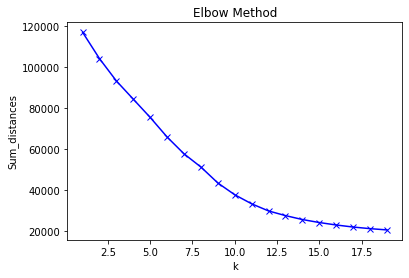

In [57]:
# k-means clustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 

# 유의미한 k 개수 정하기
sum_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_analysis)
    sum_distances.append(km.inertia_)

plt.plot(K, sum_distances, '-bx')
plt.xlabel('k')
plt.ylabel('Sum_distances')
plt.title('Elbow Method')
plt.show()

In [59]:
# k-means clustering : 10개로 지정
kmeans = KMeans(n_clusters = 10)
kmeans.fit(df_analysis)
labels = kmeans.labels_

In [81]:
new_series = pd.Series(labels)
df_analysis['clusters'] = new_series.values
result1 = df_analysis
df_analysis.head()

Price  Sales_point     Score  \
Book_Title   Author Publisher Pub_date                                      
침묵은 하염없이     안경례    지식과감성#    2022-07-07  1.561964    -0.133381 -0.405662   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.256420    -0.133381 -0.405662   
삶의 글 살며 시    김영성    산다        2022-07-01  0.753794    -0.073356 -0.405662   
행복하며 깨치며     김용환    현대시학사     2022-06-30  0.450730    -0.133381 -0.405662   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.256420    -0.133381 -0.405662   

                                           Rev_100   Rev_num  Page_num  \
Book_Title   Author Publisher Pub_date                                   
침묵은 하염없이     안경례    지식과감성#    2022-07-07 -0.156808 -0.036246  0.629024   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.156808 -0.036246  0.044227   
삶의 글 살며 시    김영성    산다        2022-07-01 -0.156808 -0.036246  1.603686   
행복하며 깨치며     김용환    현대시학사     2022-06-30 -0.156808 -0.036246  0.409725   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.156808 -0.036246 -0.077606   

                                            Weight  DBPia_rev  \
Book_Title   Author Publisher Pub_date                          
침묵은 하염없이     안경례    지식과감성#    2022-07-07  0.881390  -0.105959   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.112411  -0.105959   
삶의 글 살며 시    김영성    산다        2022-07-01  1.473849  -0.105959   
행복하며 깨치며     김용환    현대시학사     2022-06-30  0.298488  -0.105959   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.236636   0.381421   

                                          Publisher_category  Anthology  \
Book_Title   Author Publisher Pub_date                                    
침묵은 하염없이     안경례    지식과감성#    2022-07-07           -0.165997   0.266186   
시의 소굴        곽진구    시산맥사      2022-07-05           -0.165997   0.266186   
삶의 글 살며 시    김영성    산다        2022-07-01           -0.165997   0.266186   
행복하며 깨치며     김용환    현대시학사     2022-06-30           -0.165997   0.266186   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29           -0.165997   0.266186   

                                          Author_counts  pub_unixtime  \
Book_Title   Author Publisher Pub_date                                  
침묵은 하염없이     안경례    지식과감성#    2022-07-07      -0.204865      1.750989   
시의 소굴        곽진구    시산맥사      2022-07-05      -0.204865      1.750780   
삶의 글 살며 시    김영성    산다        2022-07-01      -0.126585      1.750362   
행복하며 깨치며     김용환    현대시학사     2022-06-30      -0.048305      1.742932   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29      -0.126585      1.742827   

                                          clusters  
Book_Title   Author Publisher Pub_date              
침묵은 하염없이     안경례    지식과감성#    2022-07-07         8  
시의 소굴        곽진구    시산맥사      2022-07-05         8  
삶의 글 살며 시    김영성    산다        2022-07-01         8  
행복하며 깨치며     김용환    현대시학사     2022-06-30         8  
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29         8

In [79]:
df.head()

Price  Sales_point  Score  Rev_100  \
Book_Title   Author Publisher Pub_date                                         
침묵은 하염없이     안경례    지식과감성#    2022-07-07  19000           10    0.0        0   
시의 소굴        곽진구    시산맥사      2022-07-05  10000           10    0.0        0   
삶의 글 살며 시    김영성    산다        2022-07-01  15000           80    0.0        0   
행복하며 깨치며     김용환    현대시학사     2022-06-30  13500           10    0.0        0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29  10000           10    0.0        0   

                                          Rev_num  Page_num  Weight  \
Book_Title   Author Publisher Pub_date                                
침묵은 하염없이     안경례    지식과감성#    2022-07-07        0     208.0   312.0   
시의 소굴        곽진구    시산맥사      2022-07-05        0     160.0   208.0   
삶의 글 살며 시    김영성    산다        2022-07-01        0     288.0   374.0   
행복하며 깨치며     김용환    현대시학사     2022-06-30        0     190.0   251.0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29        0     150.0   195.0   

                                          DBPia_rev Publisher_category  \
Book_Title   Author Publisher Pub_date                                   
침묵은 하염없이     안경례    지식과감성#    2022-07-07        0.0                  0   
시의 소굴        곽진구    시산맥사      2022-07-05        0.0                  0   
삶의 글 살며 시    김영성    산다        2022-07-01        0.0                  0   
행복하며 깨치며     김용환    현대시학사     2022-06-30        0.0                  0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29       14.0                  0   

                                          Anthology  Author_counts  \
Book_Title   Author Publisher Pub_date                               
침묵은 하염없이     안경례    지식과감성#    2022-07-07          1              1   
시의 소굴        곽진구    시산맥사      2022-07-05          1              1   
삶의 글 살며 시    김영성    산다        2022-07-01          1              2   
행복하며 깨치며     김용환    현대시학사     2022-06-30          1              3   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29          1              2   

                                         pub_unixtime  
Book_Title   Author Publisher Pub_date                 
침묵은 하염없이     안경례    지식과감성#    2022-07-07     20220707  
시의 소굴        곽진구    시산맥사      2022-07-05     20220705  
삶의 글 살며 시    김영성    산다        2022-07-01     20220701  
행복하며 깨치며     김용환    현대시학사     2022-06-30     20220630  
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29     20220629

In [82]:
result1 = result1.drop(columns=['Price', 'Sales_point', 'Score', 'Rev_100', 'Rev_num', 'Page_num', 'Weight', 'DBPia_rev', 'Publisher_category', 'Anthology', 'Author_counts', 'pub_unixtime'])
result1.head()

clusters
Book_Title   Author Publisher Pub_date            
침묵은 하염없이     안경례    지식과감성#    2022-07-07         8
시의 소굴        곽진구    시산맥사      2022-07-05         8
삶의 글 살며 시    김영성    산다        2022-07-01         8
행복하며 깨치며     김용환    현대시학사     2022-06-30         8
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29         8

In [83]:
result1 = pd.concat([result1, df], axis=1)
result1.head()

clusters  Price  Sales_point  Score  \
Book_Title   Author Publisher Pub_date                                          
침묵은 하염없이     안경례    지식과감성#    2022-07-07         8  19000           10    0.0   
시의 소굴        곽진구    시산맥사      2022-07-05         8  10000           10    0.0   
삶의 글 살며 시    김영성    산다        2022-07-01         8  15000           80    0.0   
행복하며 깨치며     김용환    현대시학사     2022-06-30         8  13500           10    0.0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29         8  10000           10    0.0   

                                          Rev_100  Rev_num  Page_num  Weight  \
Book_Title   Author Publisher Pub_date                                         
침묵은 하염없이     안경례    지식과감성#    2022-07-07        0        0     208.0   312.0   
시의 소굴        곽진구    시산맥사      2022-07-05        0        0     160.0   208.0   
삶의 글 살며 시    김영성    산다        2022-07-01        0        0     288.0   374.0   
행복하며 깨치며     김용환    현대시학사     2022-06-30        0        0     190.0   251.0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29        0        0     150.0   195.0   

                                          DBPia_rev Publisher_category  \
Book_Title   Author Publisher Pub_date                                   
침묵은 하염없이     안경례    지식과감성#    2022-07-07        0.0                  0   
시의 소굴        곽진구    시산맥사      2022-07-05        0.0                  0   
삶의 글 살며 시    김영성    산다        2022-07-01        0.0                  0   
행복하며 깨치며     김용환    현대시학사     2022-06-30        0.0                  0   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29       14.0                  0   

                                          Anthology  Author_counts  \
Book_Title   Author Publisher Pub_date                               
침묵은 하염없이     안경례    지식과감성#    2022-07-07          1              1   
시의 소굴        곽진구    시산맥사      2022-07-05          1              1   
삶의 글 살며 시    김영성    산다        2022-07-01          1              2   
행복하며 깨치며     김용환    현대시학사     2022-06-30          1              3   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29          1              2   

                                         pub_unixtime  
Book_Title   Author Publisher Pub_date                 
침묵은 하염없이     안경례    지식과감성#    2022-07-07     20220707  
시의 소굴        곽진구    시산맥사      2022-07-05     20220705  
삶의 글 살며 시    김영성    산다        2022-07-01     20220701  
행복하며 깨치며     김용환    현대시학사     2022-06-30     20220630  
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29     20220629

AttributeError: 'DataFrame' object has no attribute 'pub_unixtime'

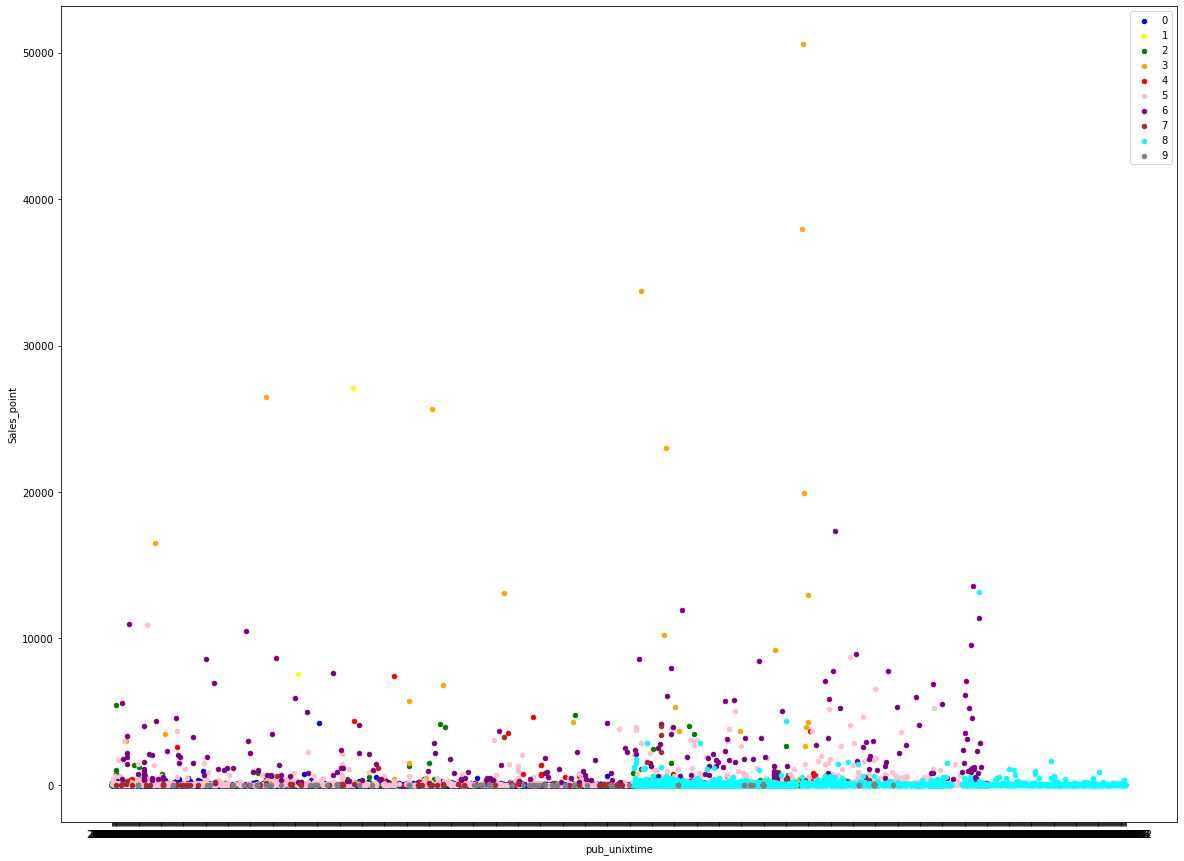

In [88]:
# scatter plot
from sklearn.datasets import make_blobs

# 중심점 구하기
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(result1, 'clusters')

# x,y의 plot scatter
colors = {0 : 'blue', 1 : 'yellow', 2 : 'green', 3 : 'orange', 4 : 'red', 5: 'pink', 6:'purple', 7:'brown', 8:'cyan', 9:'grey'}
fig, ax = plt.subplots()
grouped = result1.groupby('clusters')
for key, group in grouped:
  group.plot(ax = ax, kind = 'scatter', x = 'pub_unixtime', y = 'Sales_point', label = key, color=colors[key], figsize=(20,15))

# 중심점 표시
plt.scatter(centroids.pub_unixtime, centroids.Sales_point, c='red')

plt.title('10그룹 분류', fontsize=20)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'pub_unixtime'

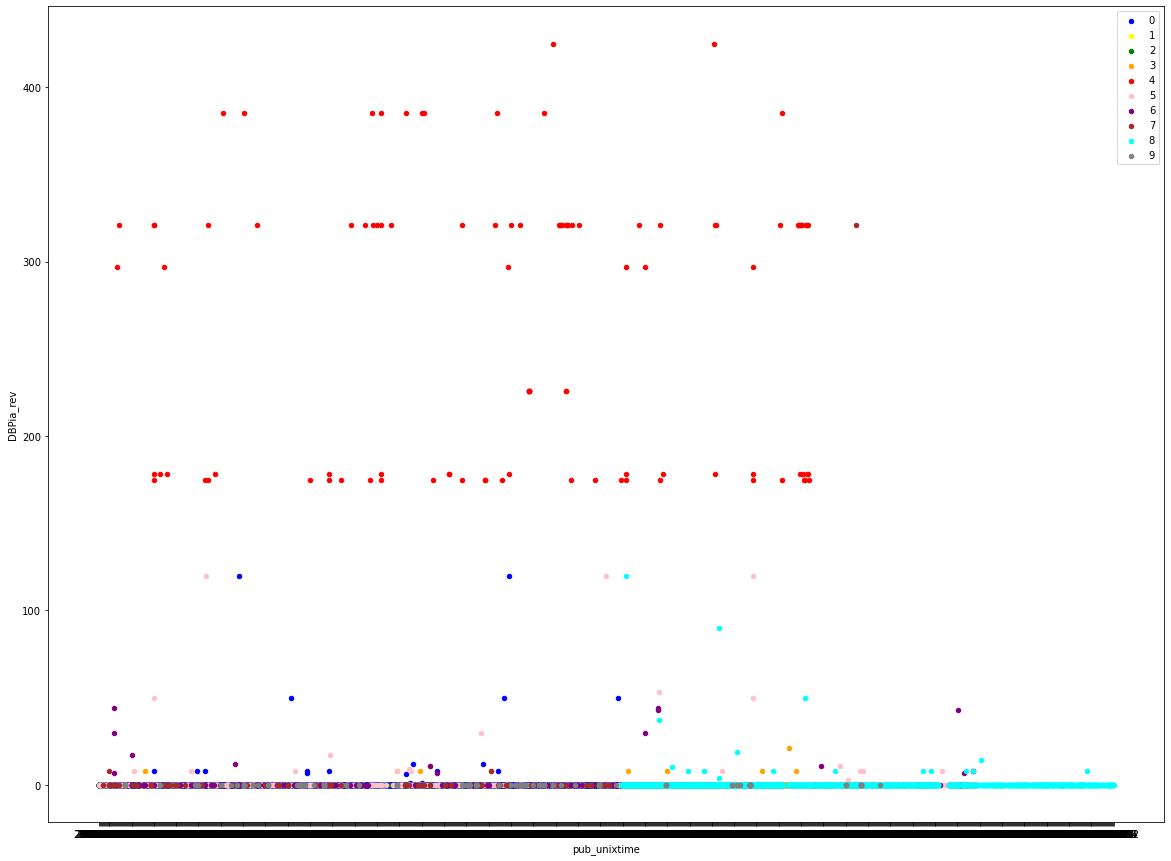

In [89]:
# scatter plot
from sklearn.datasets import make_blobs

# 중심점 구하기
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(result1, 'clusters')

# x,y의 plot scatter
colors = {0 : 'blue', 1 : 'yellow', 2 : 'green', 3 : 'orange', 4 : 'red', 5: 'pink', 6:'purple', 7:'brown', 8:'cyan', 9:'grey'}
fig, ax = plt.subplots()
grouped = result1.groupby('clusters')
for key, group in grouped:
  group.plot(ax = ax, kind = 'scatter', x = 'pub_unixtime', y = 'DBPia_rev', label = key, color=colors[key], figsize=(20,15))

# 중심점 표시
plt.scatter(centroids.pub_unixtime, centroids.DBPia_rev, c='red')

plt.title('10그룹 분류', fontsize=20)

plt.show()

In [62]:
# group별로 출력
condition1 = (result1['clusters'] == 0)
condition2 = (result1['clusters'] == 1)
condition3 = (result1['clusters'] == 2)
condition4 = (result1['clusters'] == 3)
condition5 = (result1['clusters'] == 4)
condition6 = (result1['clusters'] == 5)
condition7 = (result1['clusters'] == 6)
condition8 = (result1['clusters'] == 7)
condition9 = (result1['clusters'] == 8)
condition10 = (result1['clusters'] == 9)

cluster0 = result1[condition1].reset_index(drop=False)
cluster1 = result1[condition2].reset_index(drop=False)
cluster2 = result1[condition3].reset_index(drop=False)
cluster3 = result1[condition4].reset_index(drop=False)
cluster4 = result1[condition5].reset_index(drop=False)
cluster5 = result1[condition6].reset_index(drop=False)
cluster6 = result1[condition7].reset_index(drop=False)
cluster7 = result1[condition8].reset_index(drop=False)
cluster8 = result1[condition9].reset_index(drop=False)
cluster9 = result1[condition10].reset_index(drop=False)

In [63]:
cluster0

Book_Title Author    Publisher    Pub_date     Price  \
0                  파랑을 편애할 때    이재린  신아출판사(SINA)  2020-12-31  0.147666   
1                    칸트의 산책로     최준          황금알  2020-12-31 -0.256420   
2                아라비안나이트 영화관    김종부           밥북  2020-12-31 -0.256420   
3     당신을 머리맡에 두고 편히 잔 적 없었다    정영희         책과나무  2020-12-31 -0.054377   
4                     반란의 바다    이선미         시와사람  2020-12-31 -0.256420   
...                      ...    ...          ...         ...       ...   
4114                더불어 사는 삶    최병년           북랩  2019-04-15 -0.054377   
4115          내일은 내일의 바람이 분다    윤석환         월간문학  2019-04-15 -0.256420   
4116                엄마의 콩 심기    김태동       오늘의문학사  2019-04-15 -0.458462   
4117                 끌고 온 바다    오광운         시문학사  2019-04-15  0.753794   
4118               하늘 날아가는 날    신현규         월간문학  2019-04-15  0.147666   

      Sales_point     Score   Rev_100   Rev_num  Page_num    Weight  \
0       -0.133381 -0.405662 -0.156808 -0.036246  0.531558  1.531184   
1       -0.129093 -0.405662 -0.156808 -0.036246 -0.150706  0.000000   
2       -0.124806 -0.405662 -0.156808 -0.036246 -0.248172 -0.408641   
3       -0.116231 -0.405662 -0.156808 -0.036246  0.336625  0.183818   
4       -0.133381 -0.405662 -0.156808 -0.036246 -0.345638 -0.513754   
...           ...       ...       ...       ...       ...       ...   
4114    -0.133381 -0.405662 -0.156808 -0.036246  0.117326 -0.035965   
4115    -0.132523 -0.405662 -0.156808 -0.036246  0.263526 -0.007298   
4116    -0.133381 -0.405662 -0.156808 -0.036246 -0.150706  0.518271   
4117    -0.133381 -0.405662 -0.156808 -0.036246 -0.077606 -0.236636   
4118    -0.132523 -0.405662 -0.156808 -0.036246 -0.650220 -0.513754   

      DBPia_rev  Publisher_category  Anthology  Author_counts  pub_unixtime  \
0     -0.105959           -0.165997   0.266186      -0.126585     -0.287111   
1     -0.105959           -0.165997   0.266186      -0.204865     -0.287111   
2     -0.105959           -0.165997   0.266186      -0.204865     -0.287111   
3     -0.105959           -0.165997   0.266186      -0.204865     -0.287111   
4     -0.105959           -0.165997   0.266186      -0.204865     -0.287111   
...         ...                 ...        ...            ...           ...   
4114  -0.105959           -0.165997   0.266186      -0.204865     -1.418970   
4115  -0.105959           -0.165997   0.266186      -0.204865     -1.418970   
4116  -0.105959           -0.165997   0.266186      -0.204865     -1.418970   
4117  -0.105959           -0.165997   0.266186      -0.204865     -1.418970   
4118  -0.105959           -0.165997   0.266186      -0.204865     -1.418970   

      clusters  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
4114         0  
4115         0  
4116         0  
4117         0  
4118         0  

[4119 rows x 17 columns]

In [64]:
cluster1

Book_Title Author Publisher    Pub_date     Price  \
0  시 읽는 밤 : 시 밤 (니 생각 에디션)    하상욱    위즈덤하우스  2020-05-20 -0.013968   
1         시를 잊은 그대에게 (리커버)    정재찬     휴머니스트  2020-03-16  0.753794   

   Sales_point     Score    Rev_100    Rev_num  Page_num    Weight  DBPia_rev  \
0     6.340740  2.485977   8.954894  82.598301  0.970156  1.970750  -0.105959   
1    23.073983  2.456166  26.722714  52.119681  1.749885  1.922971  -0.105959   

   Publisher_category  Anthology  Author_counts  pub_unixtime  clusters  
0           -0.165997   0.266186      -0.204865     -0.361514         1  
1           -0.165997   0.266186      -0.204865     -0.382862         1

In [65]:
cluster2

Book_Title                                           Author  \
0                앵꼽습니까                                            시목문학회   
1      햇살 속 그리움 그리고 영성                                          김성호,류해욱   
2         명시, 가곡으로 만나다                                           시를 꿈꾸다   
3       [큰글씨책] 꽃 지는 저녁                                          정호승,강병인   
4          꽃보다 아름다운 하루                                      윤동주,김소월,한용운   
..                 ...                                              ...   
603       잠시 쉬어 가도 괜찮아  김기준,김애란,김영희,김태선,신남춘,염정금,원임덕,이관일,이정식,이한센,임하초,정인경   
604        선비의 노래를 부르며                                           한가락 모임   
605  [POD] 달에 그대 그리오리다                                         신용섭(샛삭이)   
606          독수리 힘껏 날다                                          한반도문인협회   
607              교실의 시    김승일,김행숙,김현,배수연,서윤후,서효인,신철규,신해욱,오은,유진목,임솔아,황인찬   

        Publisher    Pub_date     Price  Sales_point     Score   Rev_100  \
0           현대시학사  2022-06-20 -0.256420    -0.133381 -0.405662 -0.156808   
1             솔과학  2022-06-20  1.764007     0.038119 -0.405662 -0.156808   
2    시사랑음악사랑(시음사)  2022-06-17  1.157879    -0.133381 -0.405662 -0.156808   
3             파람북  2022-06-17  2.976263    -0.133381 -0.405662 -0.156808   
4              예가  2022-06-15  0.349708    -0.133381 -0.405662 -0.156808   
..            ...         ...       ...          ...       ...       ...   
603         문화발전소  2019-04-30  0.147666    -0.126521 -0.405662 -0.156808   
604           다운샘  2019-04-28  1.561964    -0.133381 -0.405662 -0.156808   
605    부크크(bookk)  2019-04-19 -0.256420    -0.133381 -0.405662 -0.156808   
606            국보  2019-04-15  0.753794    -0.133381 -0.405662 -0.156808   
607           돌베개  2019-04-15  0.551751     0.574056  1.979195  0.298777   

      Rev_num  Page_num    Weight  DBPia_rev  Publisher_category  Anthology  \
0   -0.036246 -0.235989  0.000000  -0.105959           -0.165997  -3.756774   
1   -0.036246  2.176300  0.000000  -0.105959           -0.165997  -3.756774   
2   -0.036246 -0.345638  0.000000  -0.105959           -0.165997  -3.756774   
3   -0.036246  0.287892  0.000000  -0.105959           -0.165997  -3.756774   
4   -0.036246  0.714307  1.072506  -0.105959           -0.165997  -3.756774   
..        ...       ...       ...        ...                 ...        ...   
603 -0.036246 -0.053239 -0.207969  -0.105959           -0.165997  -3.756774   
604 -0.036246  1.883901  3.241669  -0.105959           -0.165997  -3.756774   
605 -0.036246 -0.686770  0.000000  -0.105959           -0.165997  -3.756774   
606 -0.036246  1.701152  1.578963  -0.105959           -0.165997  -3.756774   
607 -0.036246  0.726490  0.910058  -0.105959           -0.165997  -3.756774   

     Author_counts  pub_unixtime  clusters  
0        -0.126585      1.741885         2  
1        -0.204865      1.741885         2  
2         0.108255      1.741571         2  
3        -0.126585      1.741571         2  
4        -0.126585      1.741362         2  
..             ...           ...       ...  
603      -0.204865     -1.417400         2  
604      -0.126585     -1.417609         2  
605      -0.204865     -1.418551         2  
606      -0.204865     -1.418970         2  
607      -0.204865     -1.418970         2  

[608 rows x 17 columns]

In [66]:
cluster3

Book_Title                             Author  \
0             너무 잘하려고 애쓰지 마라                                나태주   
1                  너의 하늘을 보아                                박노해   
2           꽃샘바람에 흔들린다면 너는 꽃                                류시화   
3             일하고 일하고 사랑을 하고                                최지인   
4           헌팅턴비치에 가면 네가 있을까                                이어령   
5                   꽃잎 한 장처럼                                이해인   
6         혼자 점심 먹는 사람을 위한 시집  강혜빈,김승일,김현,백은선,성다영,안미옥,오은,주민현,황인찬   
7                     시를 읽는다                                박완서   
8                     시소 첫번째    김리윤,손보미,신이인,안미옥,염승숙,이서수,조혜은,최은영   
9               서로 다른 계절의 여행                                나태주   
10             잠시만 웅크리고 있을게요                                정예원   
11                내가 사랑하는 사람                                정호승   
12       가지 말라는데 가고 싶은 길이 있다                                나태주   
13            나는 천사에게 말을 배웠지                                정현우   
14                  사랑만이 남는다                                나태주   
15                     시, 공간                                조종하   
16                     마음의 일                              재수,오은   
17              그런 사람 또 없습니다                                원태연   
18            사막에서는 길을 묻지 마라                                나태주   
19                       말장난                                유병재   
20                      경계에서                                 이우   
21                     시와 산책                                한정원   
22        마음 시툰 : 용기 있게, 가볍게                                김성라   
23          그대, 꽃처럼 내게 피어났으니                                이경선   
24     너 없는 봄날, 영원한 꽃이 되고 싶다                                이창훈   
25  나는 되어가는 기분이다 (어나더커버 에디션)                                이영재   
26      세상에 그저 피는 꽃은 없다 사랑처럼                                윤보영   
27                너만 모르는 그리움                                나태주   
28                   당신을 찾아서                                정호승   
29              당신이 오늘은 꽃이에요                            나태주,김예원   
30          너와 함께라면 인생도 여행이다                                나태주   
31                사랑을 위한 되풀이                                황인찬   
32             끝까지 남겨두는 그 마음                                나태주   
33               다시 오지 않는 것들                                최영미   
34       당신을 행복하게 하는 단 하나의 시                                조서희   

                     Publisher    Pub_date     Price  Sales_point     Score  \
0                          열림원  2022-05-31  0.551751    28.781499  2.456166   
1                         느린걸음  2022-05-13  1.662985    32.395859  2.545598   
2                         수오서재  2022-04-11  0.450730    43.260376  2.456166   
3                           창비  2022-03-18 -0.458462    16.969445  2.515787   
4                          열림원  2022-03-15  0.349708     8.651701  2.515787   
5                         시산맥사  2022-02-28  0.955836    19.593393  2.485977   
6                        한겨레출판  2022-02-14  0.147666     2.166433  2.396545   
7                         시산맥사  2022-01-20  0.349708     4.403649  2.545598   
8                        자음과모음  2022-01-07  0.511342     3.246024  2.336923   
9                         시산맥사  2022-01-03  0.753794     3.015357  2.515787   
10                        푸른향기  2021-08-19  0.551751    -0.049346  2.515787   
11                          비채  2021-07-30  1.117470     3.040225  2.485977   
12                       &(앤드)  2021-03-25  2.774220     7.762474  2.515787   
13                          창비  2021-01-31 -0.458462    10.954944  2.396545   
14                        마음서재  2021-01-07  0.551751     3.567587  2.545598   
15                       이상공작소  2021-01-01  0.753794     0.044979  2.575409   
16                        창비교육  2020-12-14  0.551751     2.422825  2.485977   
17  ,배정애 (캘리그래피),히조 (삽화)북로그컴퍼니  2020-11-10  0.511342    14.000782  2.545598   
18                         열림원  2020-11-05  0.349708     0.218194  2.515787   
19                   arte

In [67]:
cluster4

Book_Title Author   Publisher    Pub_date     Price  \
0                  한용운 작품집    한용운        시산맥사  2022-06-10  0.753794   
1                  정지용 작품집    정지용        시산맥사  2022-06-10  0.753794   
2                  김소월 작품집    김소월        시산맥사  2022-06-10  0.955836   
3                   바람이 불어    윤동주     휴먼컬처아리랑  2022-04-28  0.147666   
4                 읽고 쓰는 향수    정지용        모든북스  2022-03-31 -0.013968   
..                     ...    ...         ...         ...       ...   
98          [큰글씨책] 김소월 시집     김소월        정씨책방  2019-06-14  3.178305   
99                  윤동주 시집    윤동주        리플레이  2019-06-13  0.511342   
100  [POD] 시(詩), 잠 못 이루는 밤    윤동주  부크크(bookk)  2019-06-04  0.268891   
101                 김소월 시집    김소월        리플레이  2019-05-15  0.511342   
102             [큰글씨 특별판]     김소월  부크크(bookk)  2019-04-15  0.854815   

     Sales_point     Score   Rev_100   Rev_num  Page_num    Weight  DBPia_rev  \
0      -0.133381 -0.405662 -0.156808 -0.036246  3.236245  3.146112   6.090725   
1      -0.090506 -0.405662 -0.156808 -0.036246  2.042284  1.922971  10.233452   
2      -0.133381 -0.405662 -0.156808 -0.036246  3.821042  3.738570   5.986287   
3      -0.051918 -0.405662 -0.156808 -0.036246  0.263526  0.000000  11.068960   
4      -0.030481 -0.405662 -0.156808 -0.036246  0.044227  0.002258  10.233452   
..           ...       ...       ...       ...       ...       ...        ...   
98     -0.034768 -0.405662 -0.156808 -0.036246  1.177271  0.000000   5.986287   
99     -0.093078 -0.405662 -0.156808 -0.036246 -0.150706 -0.542422  11.068960   
100    -0.128236 -0.405662 -0.156808 -0.036246  0.251342  0.000000  11.068960   
101    -0.107656 -0.405662 -0.156808 -0.036246  1.774252  1.655409   5.986287   
102    -0.072498 -0.405662 -0.156808 -0.036246  1.774252  0.000000   5.986287   

     Publisher_category  Anthology  Author_counts  pub_unixtime  clusters  
0             -0.165997   0.266186       1.047617      1.740839         4  
1             -0.165997   0.266186       0.186536      1.740839         4  
2             -0.165997   0.266186       1.517297      1.740839         4  
3             -0.165997   0.266186       2.769779      1.721793         4  
4             -0.165997   0.266186       0.186536      1.711642         4  
..                  ...        ...            ...           ...       ...  
98            -0.165997   0.266186       1.517297     -1.398145         4  
99            -0.165997   0.266186       2.769779     -1.398250         4  
100           -0.165997   0.266186       2.769779     -1.399191         4  
101           -0.165997   0.266186       1.517297     -1.408505         4  
102           -0.165997   0.266186       1.517297     -1.418970         4  

[103 rows x 17 columns]

In [68]:
cluster5

Book_Title Author Publisher    Pub_date     Price  \
0                 사람보다 서귀포가 그리울 때가 있다    오승철       황금알  2022-06-27  0.753794   
1                                저 꽃잎    전문구       노트북  2022-06-20 -0.256420   
2                            길 위의 소방관    고제평      시산맥사  2022-06-16 -0.256420   
3                   그라시재라, 서남 전라도 서사시     조정     이소노미아  2022-06-15  1.056858   
4                             어글리 플라워    황용순    앨리스북클럽  2022-06-15 -0.256420   
...                               ...    ...       ...         ...       ...   
1014                  벚꽃이 내려 내 눈에 닿았다    안연순        강건  2019-04-23  0.147666   
1015                        하얀 설원의 뜨락    송연화        강건  2019-04-22  0.147666   
1016                  오늘은 비가 내렸으면 좋겠다    지현순        강건  2019-04-17  0.147666   
1017  언제까지고 우리는 너희를 멀리 보낼 수가 없다 (리커버)    신경림      걷는사람  2019-04-16  0.147666   
1018         아내의 산소에 시집을 올려놓고 가는 길입니다    정원준        강건  2019-04-16  0.147666   

      Sales_point     Score   Rev_100   Rev_num  Page_num    Weight  \
0        0.038119  2.575409 -0.156808  0.045247 -0.540570 -0.599756   
1        1.641643  2.575409 -0.156808  0.126741 -0.150706 -0.313083   
2        0.201044  1.979195 -0.156808  0.045247 -0.296905 -0.456420   
3        1.178593  2.575409 -0.156808  0.045247  1.067622  1.168064   
4        3.073667  2.575409  0.298777  0.045247  0.044227 -0.571089   
...           ...       ...       ...       ...       ...       ...   
1014    -0.124806  2.575409  0.298777  0.045247 -0.443104 -0.609312   
1015    -0.130808  2.575409  0.298777  0.045247 -0.248172 -0.408641   
1016    -0.123091  2.575409 -0.156808  0.045247 -0.443104 -0.609312   
1017     0.006392  2.575409  0.298777  0.045247 -0.370005 -0.532866   
1018    -0.129093  2.575409 -0.156808  0.045247 -0.443104 -0.609312   

      DBPia_rev  Publisher_category  Anthology  Author_counts  pub_unixtime  \
0     -0.105959           -0.165997   0.266186      -0.048305      1.742618   
1     -0.105959           -0.165997   0.266186      -0.126585      1.741885   
2     -0.105959           -0.165997   0.266186      -0.204865      1.741467   
3     -0.105959           -0.165997   0.266186      -0.204865      1.741362   
4     -0.105959           -0.165997   0.266186      -0.204865      1.741362   
...         ...                 ...        ...            ...           ...   
1014  -0.105959           -0.165997   0.266186      -0.204865     -1.418133   
1015  -0.105959           -0.165997   0.266186       0.421376     -1.418237   
1016  -0.105959           -0.165997   0.266186      -0.126585     -1.418760   
1017  -0.105959           -0.165997   0.266186      -0.204865     -1.418865   
1018  -0.105959           -0.165997   0.266186      -0.204865     -1.418865   

      clusters  
0            5  
1            5  
2            5  
3            5  
4            5  
...        ...  
1014         5  
1015         5  
1016         5  
1017         5  
1018         5  

[1019 rows x 17 columns]

In [69]:
cluster6

Book_Title Author Publisher    Pub_date     Price  Sales_point  \
0         그림자를 가지러 가야 한다    신동호        창비  2022-06-17 -0.256420     1.898893   
1    이해할 수 없는 점이 마음에 듭니다    조말선      문학동네  2022-06-15 -0.256420     1.684518   
2     나는 나를 사랑해서 나를 혐오하고    서효인      문학동네  2022-06-10 -0.256420     7.223964   
3             아름다운 사람 하나    고정희      문학동네  2022-06-09 -0.256420     0.646944   
4            몸과 마음을 산뜻하게    정재율       민음사  2022-06-07  0.147666     5.920565   
..                   ...    ...       ...         ...       ...          ...   
250      우리가 훔친 것들이 만발한다    최문자       민음사  2019-05-10 -0.256420     0.536326   
251      당신이 있다면 당신이 있기를    송승환      문학동네  2019-05-09 -0.256420     0.158169   
252             흰 밤에 꿈꾸다    정희성        창비  2019-04-30 -0.458462     0.049267   
253              우주적인 안녕    하재연    문학과지성사  2019-04-24 -0.458462     2.015513   
254       이런 얘기는 좀 어지러운가    유계영      문학동네  2019-04-22 -0.256420     1.798565   

        Score   Rev_100   Rev_num  Page_num    Weight  DBPia_rev  \
0   -0.405662 -0.156808 -0.036246 -0.491837 -0.532866  -0.105959   
1   -0.405662 -0.156808 -0.036246 -0.053239 -0.293971  -0.105959   
2   -0.405662 -0.156808 -0.036246 -0.394371 -0.580645  -0.105959   
3   -0.405662 -0.156808 -0.036246 -0.735503 -0.494643  -0.105959   
4   -0.405662 -0.156808 -0.036246  0.336625  0.365378  -0.105959   
..        ...       ...       ...       ...       ...        ...   
250  1.979195  0.298777 -0.036246  0.190426  0.202930  -0.105959   
251  1.979195  0.298777  0.045247 -0.394371 -0.561533  -0.105959   
252  1.979195  0.754362  0.045247 -0.589304 -0.618868  -0.105959   
253  1.859952  2.121118  0.371222 -0.162889 -0.093300  -0.105959   
254  2.575409  0.298777  0.126741 -0.101973 -0.332194  -0.105959   

     Publisher_category  Anthology  Author_counts  pub_unixtime  clusters  
0              6.024217   0.266186      -0.204865      1.741571         6  
1              6.024217   0.266186      -0.126585      1.741362         6  
2              6.024217   0.266186      -0.204865      1.740839         6  
3              6.024217   0.266186      -0.048305      1.740734         6  
4              6.024217   0.266186      -0.204865      1.740525         6  
..                  ...        ...            ...           ...       ...  
250            6.024217   0.266186      -0.126585     -1.409028         6  
251            6.024217   0.266186      -0.204865     -1.409133         6  
252            6.024217   0.266186      -0.204865     -1.417400         6  
253            6.024217   0.266186      -0.204865     -1.418028         6  
254            6.024217   0.266186      -0.126585     -1.418237         6  

[255 rows x 17 columns]

In [70]:
cluster7

Book_Title  \
0                                       시와 산문 세트 - 전2권   
1                                             네 번째 이야기   
2                                   피천득 문학 전집 세트 - 전7권   
3                                           리라꽃 그늘 아래서   
4    [세트] 예순 살, 나는 또 깨꽃이 되어 + 꿈이 다시 나를 찾아와 불러줄 때까지 ...   
..                                                 ...   
129                        기억해 봐, 마지막으로 시인이었던 것이 언제였는지   
130                                       거제 바람이 머무는 곳   
131                                    시詩, 별을 보며 점을 치다   
132                                               숨비소리   
133                                               가야풍운   

                      Author   Publisher    Pub_date      Price  Sales_point  \
0                        이충이        시산맥사  2022-06-07   7.825286    -0.133381   
1                        김류하  부크크(bookk)  2022-06-02   5.804859    -0.133381   
2    피천득,윌리엄 셰익스피어,찰스 램,메리 램        시산맥사  2022-05-26  28.029549    -0.064781   
3                        이정록    샘문(도서출판)  2022-05-21   1.764007    -0.116231   
4                        이순자       휴머니스트  2022-05-09   3.178305     1.200031   
..                       ...         ...         ...        ...          ...   
129                      신동옥          파란  2019-05-20   2.168092    -0.107656   
130                      양태철       현대시문학  2019-05-10   5.400774    -0.133381   
131                      이정록    샘문(도서출판)  2019-05-04   1.764007    -0.127378   
132                      박종국       천년의시작  2019-05-01  -0.458462    -0.116231   
133                      이종관         다운샘  2019-04-27   1.764007    -0.133381   

        Score   Rev_100   Rev_num   Page_num     Weight  DBPia_rev  \
0   -0.405662 -0.156808 -0.036246  14.664158   0.000000  -0.105959   
1   -0.405662 -0.156808 -0.036246  10.010146   0.000000  -0.105959   
2   -0.405662 -0.156808 -0.036246  28.017028  30.752775  -0.105959   
3   -0.405662 -0.156808 -0.036246   5.575434   6.022403  -0.105959   
4   -0.405662 -0.156808 -0.036246   3.553010   2.916773  -0.105959   
..        ...       ...       ...        ...        ...        ...   
129 -0.405662 -0.156808 -0.036246   3.016946   2.916773  -0.105959   
130  2.575409 -0.156808  0.045247   7.756240  12.300554  -0.105959   
131 -0.405662 -0.156808 -0.036246   6.135865   6.414190  -0.105959   
132 -0.405662 -0.156808 -0.036246  13.007232  -0.179302  -0.105959   
133 -0.405662 -0.156808 -0.036246   2.456515   4.799262  -0.105959   

     Publisher_category  Anthology  Author_counts  pub_unixtime  clusters  
0             -0.165997   0.266186      -0.204865      1.740525         7  
1             -0.165997   0.266186       0.186536      1.740002         7  
2             -0.165997  -3.756774      -0.204865      1.732048         7  
3             -0.165997   0.266186       0.891056      1.731525         7  
4             -0.165997   0.266186      -0.048305      1.730269         7  
..                  ...        ...            ...           ...       ...  
129           -0.165997   0.266186       0.029975     -1.407982         7  
130           -0.165997   0.266186      -0.204865     -1.409028         7  
131           -0.165997   0.266186       0.891056     -1.409656         7  
132           -0.165997   0.266186      -0.204865     -1.409970         7  
133           -0.165997   0.266186      -0.126585     -1.417714         7  

[134 rows x 17 columns]

In [71]:
cluster8

Book_Title Author Publisher    Pub_date     Price  \
0                            침묵은 하염없이    안경례    지식과감성#  2022-07-07  1.561964   
1                               시의 소굴    곽진구      시산맥사  2022-07-05 -0.256420   
2                           삶의 글 살며 시    김영성        산다  2022-07-01  0.753794   
3                            행복하며 깨치며    김용환     현대시학사  2022-06-30  0.450730   
4                        히키코모리를 위한 변명    김은숙      시산맥사  2022-06-29 -0.256420   
...                               ...    ...       ...         ...       ...   
3338                  갈참나무 숲에 깃든 열네 살    박재홍     실천문학사  2021-01-01 -0.256420   
3339          당신이 숲이라고 말하자 나는 가슴이 아팠다    함선영    지식과감성#  2021-01-01 -0.660505   
3340                           뉴욕의 하늘    윤관호      시산맥사  2021-01-01 -0.458462   
3341                      당신인 줄 알았습니다    최상만     방촌문학사  2021-01-01 -0.256420   
3342  아들의 지갑 속으로 들어갈 수 있는 영광이 있을지 몰라!    왕광옥      시산맥사  2021-01-01 -0.458462   

      Sales_point     Score   Rev_100   Rev_num  Page_num    Weight  \
0       -0.133381 -0.405662 -0.156808 -0.036246  0.629024  0.881390   
1       -0.133381 -0.405662 -0.156808 -0.036246  0.044227 -0.112411   
2       -0.073356 -0.405662 -0.156808 -0.036246  1.603686  1.473849   
3       -0.133381 -0.405662 -0.156808 -0.036246  0.409725  0.298488   
4       -0.133381 -0.405662 -0.156808 -0.036246 -0.077606 -0.236636   
...           ...       ...       ...       ...       ...       ...   
3338    -0.107656 -0.405662 -0.156808 -0.036246 -0.589304 -0.590201   
3339    -0.062208 -0.405662 -0.156808 -0.036246 -0.589304 -1.373775   
3340    -0.133381 -0.405662 -0.156808 -0.036246 -0.053239 -0.236636   
3341    -0.021906 -0.405662 -0.156808 -0.036246 -0.345638  0.000000   
3342    -0.133381 -0.405662 -0.156808 -0.036246 -0.175072 -0.332194   

      DBPia_rev  Publisher_category  Anthology  Author_counts  pub_unixtime  \
0     -0.105959           -0.165997   0.266186      -0.204865      1.750989   
1     -0.105959           -0.165997   0.266186      -0.204865      1.750780   
2     -0.105959           -0.165997   0.266186      -0.126585      1.750362   
3     -0.105959           -0.165997   0.266186      -0.048305      1.742932   
4      0.381421           -0.165997   0.266186      -0.126585      1.742827   
...         ...                 ...        ...            ...           ...   
3338  -0.105959           -0.165997   0.266186       0.186536      0.641106   
3339  -0.105959           -0.165997   0.266186      -0.204865      0.641106   
3340  -0.105959           -0.165997   0.266186      -0.204865      0.641106   
3341  -0.105959           -0.165997   0.266186      -0.126585      0.641106   
3342  -0.105959           -0.165997   0.266186      -0.126585      0.641106   

      clusters  
0            8  
1            8  
2            8  
3            8  
4            8  
...        ...  
3338         8  
3339         8  
3340         8  
3341         8  
3342         8  

[3343 rows x 17 columns]

In [72]:
cluster9

Book_Title Author Publisher    Pub_date    Price  Sales_point  \
0           백련사 동백숲에 대한 몽상    김재석       사의재  2022-01-10 -0.25642    -0.133381   
1                       대전    김재석       사의재  2022-01-10 -0.25642    -0.133381   
2         영랑생가가 나에게 신신당부하다    김재석       사의재  2022-01-10 -0.25642    -0.116231   
3     다시 태어난 현구생가가 마음을 다잡다    김재석       사의재  2022-01-10 -0.25642    -0.133381   
4        영랑생가 내 눈결에 쏘인 것들은    김재석       사의재  2021-12-07 -0.25642    -0.133381   
..                     ...    ...       ...         ...      ...          ...   
110        송광사는 내 마음의 주장자다    김재석       사의재  2019-05-10 -0.25642    -0.130808   
111  대흥사는 천강에 얼굴 내민 달이 꿈이다    김재석       사의재  2019-05-10 -0.25642    -0.130808   
112         연기암은 내 마음의 죽비다    김재석       사의재  2019-05-10 -0.25642    -0.131666   
113               선암사 가는 길    김재석       사의재  2019-05-10 -0.25642    -0.129951   
114          유달산과 고하도가 통하다    김재석       사의재  2019-04-20 -0.25642    -0.133381   

        Score   Rev_100   Rev_num  Page_num    Weight  DBPia_rev  \
0   -0.405662 -0.156808 -0.036246 -0.345638 -0.513754  -0.105959   
1   -0.405662 -0.156808 -0.036246 -0.150706 -0.313083  -0.105959   
2   -0.405662 -0.156808 -0.036246 -0.345638 -0.876874  -0.105959   
3   -0.405662 -0.156808 -0.036246 -0.248172 -0.408641  -0.105959   
4   -0.405662 -0.156808 -0.036246 -0.345638 -0.876874  -0.105959   
..        ...       ...       ...       ...       ...        ...   
110 -0.405662 -0.156808 -0.036246 -0.345638 -0.513754  -0.105959   
111 -0.405662 -0.156808 -0.036246 -0.345638 -0.513754  -0.105959   
112 -0.405662 -0.156808 -0.036246 -0.053239 -0.207969  -0.105959   
113 -0.405662 -0.156808 -0.036246 -0.345638 -0.513754  -0.105959   
114 -0.405662 -0.156808 -0.036246  0.044227 -0.112411  -0.105959   

     Publisher_category  Anthology  Author_counts  pub_unixtime  clusters  
0             -0.165997   0.266186       8.719066      1.688515         9  
1             -0.165997   0.266186       8.719066      1.688515         9  
2             -0.165997   0.266186       8.719066      1.688515         9  
3             -0.165997   0.266186       8.719066      1.688515         9  
4             -0.165997   0.266186       8.719066      0.756845         9  
..                  ...        ...            ...           ...       ...  
110           -0.165997   0.266186       8.719066     -1.409028         9  
111           -0.165997   0.266186       8.719066     -1.409028         9  
112           -0.165997   0.266186       8.719066     -1.409028         9  
113           -0.165997   0.266186       8.719066     -1.409028         9  
114           -0.165997   0.266186       8.719066     -1.418446         9  

[115 rows x 17 columns]

In [91]:
# 모델 피클링
import pickle

with open('model.pkl', 'wb') as pickle_file:
    pickle.dump(kmeans, pickle_file)

In [93]:
model = None
with open('model.pkl', 'rb') as pickle_file:
    model = pickle.load(pickle_file)
    
labels = model.labels_
new_series = pd.Series(labels)
df_analysis['clusters'] = new_series.values
result1 = df_analysis
df_analysis.head()

Price  Sales_point     Score  \
Book_Title   Author Publisher Pub_date                                      
침묵은 하염없이     안경례    지식과감성#    2022-07-07  1.561964    -0.133381 -0.405662   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.256420    -0.133381 -0.405662   
삶의 글 살며 시    김영성    산다        2022-07-01  0.753794    -0.073356 -0.405662   
행복하며 깨치며     김용환    현대시학사     2022-06-30  0.450730    -0.133381 -0.405662   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.256420    -0.133381 -0.405662   

                                           Rev_100   Rev_num  Page_num  \
Book_Title   Author Publisher Pub_date                                   
침묵은 하염없이     안경례    지식과감성#    2022-07-07 -0.156808 -0.036246  0.629024   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.156808 -0.036246  0.044227   
삶의 글 살며 시    김영성    산다        2022-07-01 -0.156808 -0.036246  1.603686   
행복하며 깨치며     김용환    현대시학사     2022-06-30 -0.156808 -0.036246  0.409725   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.156808 -0.036246 -0.077606   

                                            Weight  DBPia_rev  \
Book_Title   Author Publisher Pub_date                          
침묵은 하염없이     안경례    지식과감성#    2022-07-07  0.881390  -0.105959   
시의 소굴        곽진구    시산맥사      2022-07-05 -0.112411  -0.105959   
삶의 글 살며 시    김영성    산다        2022-07-01  1.473849  -0.105959   
행복하며 깨치며     김용환    현대시학사     2022-06-30  0.298488  -0.105959   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29 -0.236636   0.381421   

                                          Publisher_category  Anthology  \
Book_Title   Author Publisher Pub_date                                    
침묵은 하염없이     안경례    지식과감성#    2022-07-07           -0.165997   0.266186   
시의 소굴        곽진구    시산맥사      2022-07-05           -0.165997   0.266186   
삶의 글 살며 시    김영성    산다        2022-07-01           -0.165997   0.266186   
행복하며 깨치며     김용환    현대시학사     2022-06-30           -0.165997   0.266186   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29           -0.165997   0.266186   

                                          Author_counts  pub_unixtime  \
Book_Title   Author Publisher Pub_date                                  
침묵은 하염없이     안경례    지식과감성#    2022-07-07      -0.204865      1.750989   
시의 소굴        곽진구    시산맥사      2022-07-05      -0.204865      1.750780   
삶의 글 살며 시    김영성    산다        2022-07-01      -0.126585      1.750362   
행복하며 깨치며     김용환    현대시학사     2022-06-30      -0.048305      1.742932   
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29      -0.126585      1.742827   

                                          clusters  
Book_Title   Author Publisher Pub_date              
침묵은 하염없이     안경례    지식과감성#    2022-07-07         8  
시의 소굴        곽진구    시산맥사      2022-07-05         8  
삶의 글 살며 시    김영성    산다        2022-07-01         8  
행복하며 깨치며     김용환    현대시학사     2022-06-30         8  
히키코모리를 위한 변명 김은숙    시산맥사      2022-06-29         8

In [94]:
conn = sqlite3.connect('poems_preprocessed.db', isolation_level=None)

df.to_sql('dataframe', conn)
df_analysis.to_sql('dataframe_processed', conn)
result1.to_sql('dataframe_kmeans', conn)
cluster0.to_sql('cluster0', conn)
cluster1.to_sql('cluster1', conn)
cluster2.to_sql('cluster2', conn)
cluster3.to_sql('cluster3', conn)
cluster4.to_sql('cluster4', conn)
cluster5.to_sql('cluster5', conn)
cluster6.to_sql('cluster6', conn)
cluster7.to_sql('cluster7', conn)
cluster8.to_sql('cluster8', conn)
cluster9.to_sql('cluster9', conn)

conn.close()

115

In [103]:
df.to_csv('csv_datafile/dataframe', sep=',')
df_analysis.to_csv('csv_datafile/dataframe_processed', sep=',')
result1.to_csv('csv_datafile/dataframe_kmeans', sep=',')
cluster0.to_csv('csv_datafile/cluster0', sep=',')
cluster1.to_csv('csv_datafile/cluster1', sep=',')
cluster2.to_csv('csv_datafile/cluster2', sep=',')
cluster3.to_csv('csv_datafile/cluster3', sep=',')
cluster4.to_csv('csv_datafile/cluster4', sep=',')
cluster5.to_csv('csv_datafile/cluster5', sep=',')
cluster6.to_csv('csv_datafile/cluster6', sep=',')
cluster7.to_csv('csv_datafile/cluster7', sep=',')
cluster8.to_csv('csv_datafile/cluster8', sep=',')
cluster9.to_csv('csv_datafile/cluster9', sep=',')


In [ ]:
# Flask

In [ ]:
# 대시보드 만들기